In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [4]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
df.describe(include='all')

country country_long             name   gppd_idnr  capacity_mw  \
count      907          907              907         907   907.000000   
unique       1            1              907         907          NaN   
top        IND        India  Gadag Wind Farm  IND0000110          NaN   
freq       907          907                1           1          NaN   
mean       NaN          NaN              NaN         NaN   326.223755   
std        NaN          NaN              NaN         NaN   590.085456   
min        NaN          NaN              NaN         NaN     0.000000   
25%        NaN          NaN              NaN         NaN    16.725000   
50%        NaN          NaN              NaN         NaN    59.200000   
75%        NaN          NaN              NaN         NaN   385.250000   
max        NaN          NaN              NaN         NaN  4760.000000   

          latitude   longitude primary_fuel other_fuel1 other_fuel2  ...  \
count   861.000000  861.000000          907         198           1  ...   
unique         NaN         NaN            8           3           1  ...   
top            NaN         NaN         Coal         Oil         Oil  ...   
freq           NaN         NaN          258         195           1  ...   
mean     21.197918   77.464907          NaN         NaN         NaN  ...   
std       6.239612    4.939316          NaN         NaN         NaN  ...   
min       8.168900   68.644700          NaN         NaN         NaN  ...   
25%      16.773900   74.256200          NaN         NaN         NaN  ...   
50%      21.780000   76.719500          NaN         NaN         NaN  ...   
75%      25.512400   79.440800          NaN         NaN         NaN  ...   
max      34.649000   95.408000          NaN         NaN         NaN  ...   

        year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
count                   519.0                  0.0          398.000000   
unique                    NaN                  NaN                 NaN   
top                       NaN                  NaN                 NaN   
freq                      NaN                  NaN                 NaN   
mean                   2019.0                  NaN         2431.823590   
std                       0.0                  NaN         4026.440035   
min                    2019.0                  NaN            0.000000   
25%                    2019.0                  NaN          223.557672   
50%                    2019.0                  NaN          801.123775   
75%                    2019.0                  NaN         3035.306250   
max                    2019.0                  NaN        28127.000000   

       generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
count           422.000000          434.000000          440.000000   
unique                 NaN                 NaN                 NaN   
top                    NaN                 NaN                 NaN   
freq                   NaN                 NaN                 NaN   
mean           2428.226946         2467.936859         2547.759305   
std            4194.596959         4162.884308         4196.991169   
min               0.000000            0.000000            0.000000   
25%             176.381063          188.285252          177.874930   
50%             711.181225          737.205450          817.977250   
75%            3084.121250         3282.861313         3275.690475   
max           30539.000000        30015.000000        35116.000000   

        generation_gwh_2018  generation_gwh_2019  \
count            448.000000                  0.0   
unique                  NaN                  NaN   
top                     NaN                  NaN   
freq                    NaN                  NaN   
mean            2600.804099                  NaN   
std             4314.880456                  NaN   
min                0.000000                  NaN   
25%              193.378250                  NaN   
50%              75

Data Visualization

<AxesSubplot:>

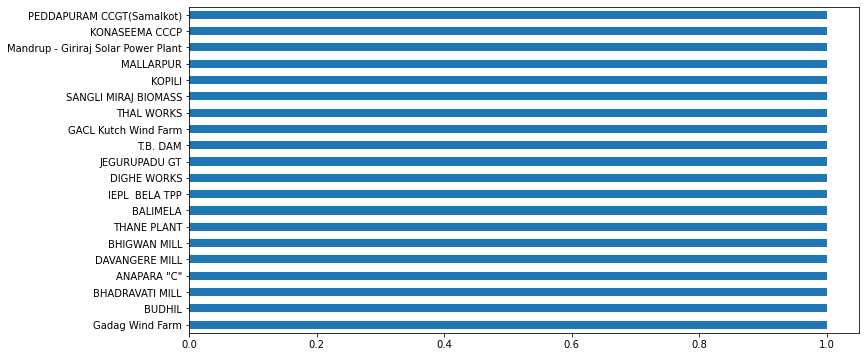

In [8]:
df['name'].value_counts().head(20).sort_values().plot.barh(figsize=(12,6))

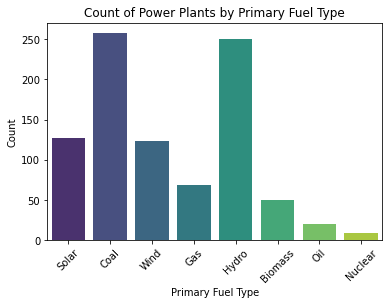

In [9]:
sns.countplot(x='primary_fuel', data=df, palette='viridis')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.title('Count of Power Plants by Primary Fuel Type')
plt.xticks(rotation=45)
plt.show()

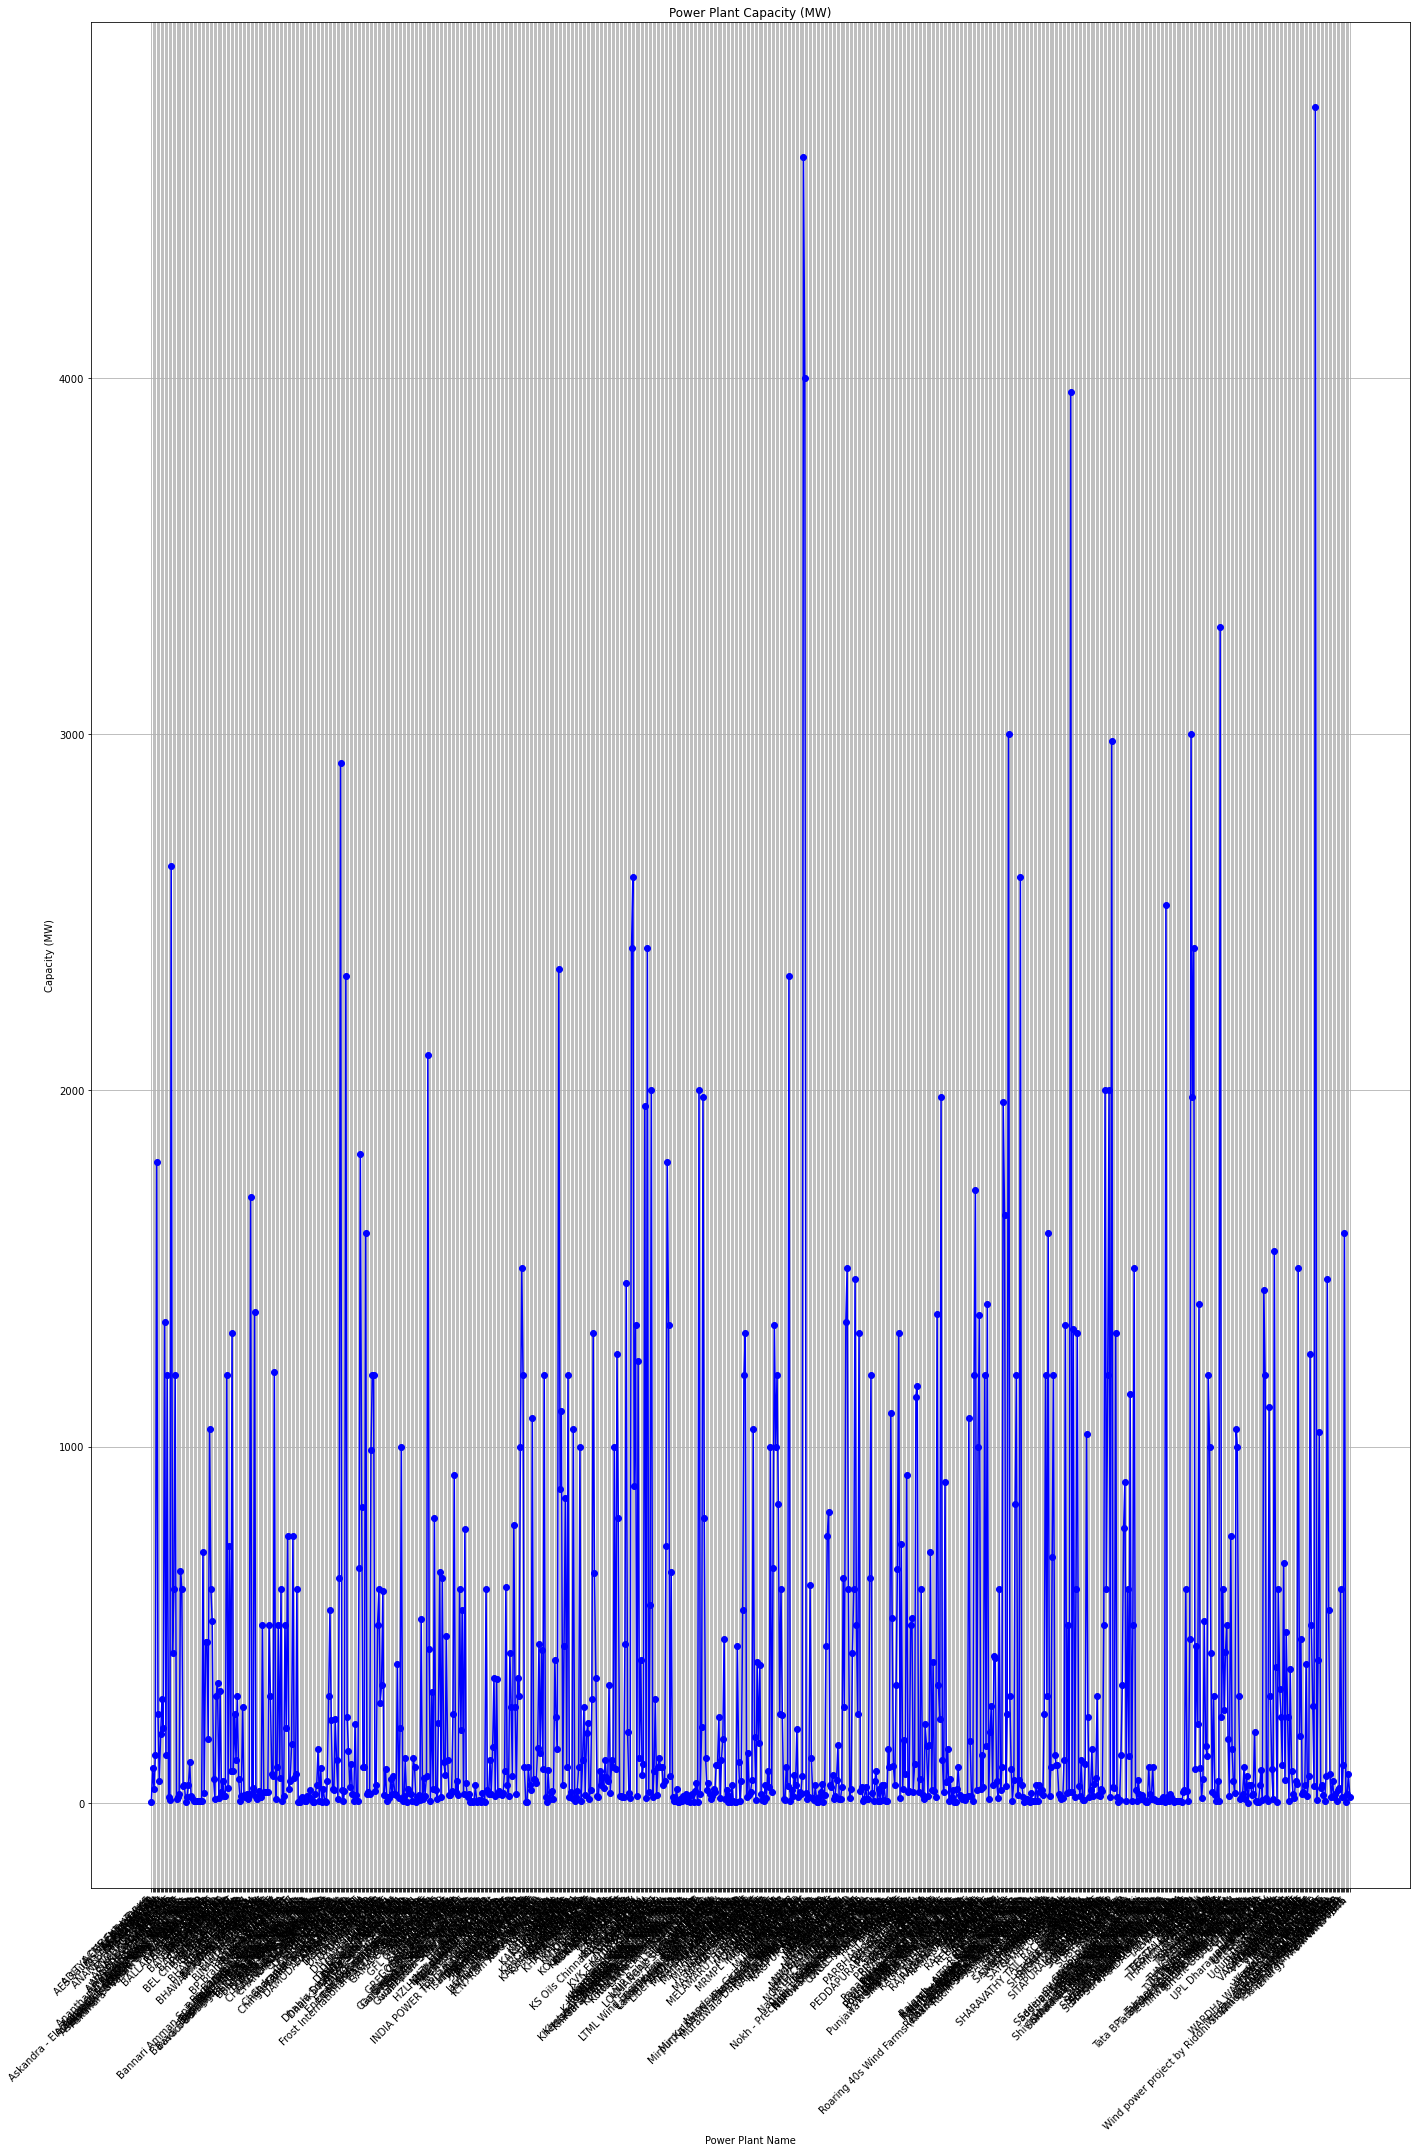

In [10]:
plt.figure(figsize=(20, 30))
plt.plot(df['name'], df['capacity_mw'], marker='o', linestyle='-', color='b')
plt.xlabel('Power Plant Name')
plt.ylabel('Capacity (MW)')
plt.title('Power Plant Capacity (MW)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

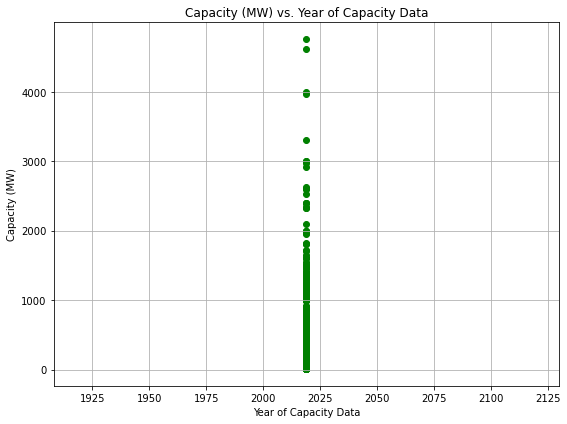

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['year_of_capacity_data'], df['capacity_mw'], marker='o', color='g')
plt.xlabel('Year of Capacity Data')
plt.ylabel('Capacity (MW)')
plt.title('Capacity (MW) vs. Year of Capacity Data')
plt.grid(True)
plt.tight_layout()
plt.show()

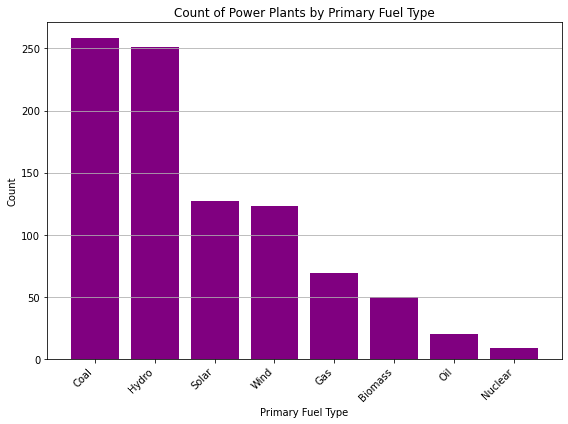

In [12]:
fuel_counts = df['primary_fuel'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(fuel_counts.index, fuel_counts.values, color='purple')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.title('Count of Power Plants by Primary Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

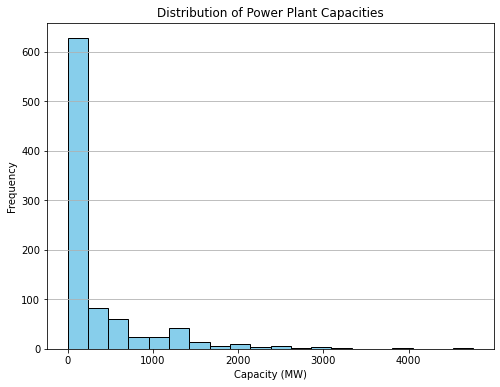

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['capacity_mw'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Power Plant Capacities')
plt.grid(axis='y')
plt.show()

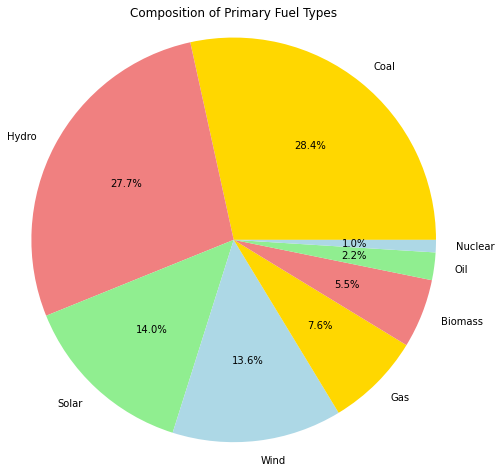

In [14]:
fuel_counts = df['primary_fuel'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightgreen', 'lightblue'])
plt.title('Composition of Primary Fuel Types')
plt.axis('equal')
plt.show()

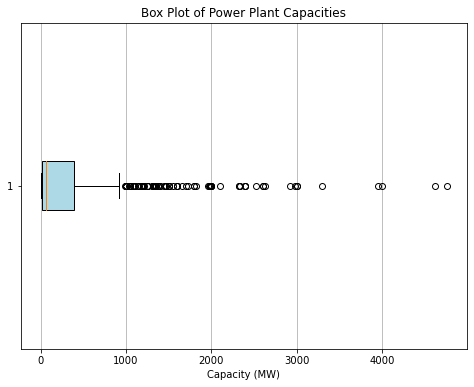

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['capacity_mw'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Capacity (MW)')
plt.title('Box Plot of Power Plant Capacities')
plt.grid(axis='x')
plt.show()

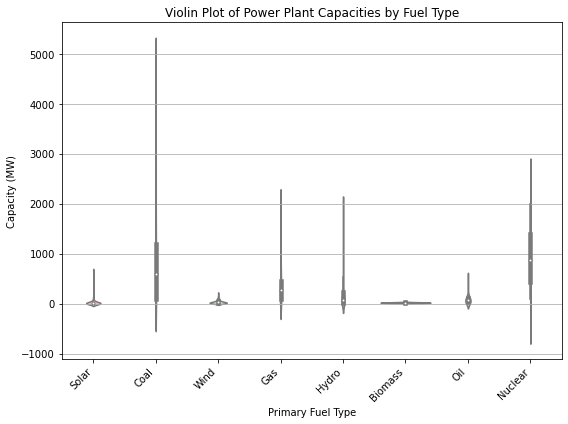

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['primary_fuel'], y=df['capacity_mw'], palette='Pastel1')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Capacity (MW)')
plt.title('Violin Plot of Power Plant Capacities by Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [17]:
import plotly.express as px

In [18]:
scatter_fig = px.scatter(df, x='year_of_capacity_data', y='capacity_mw', text='name', color='primary_fuel',
                         title='Capacity (MW) vs. Year of Capacity Data (Aggregated by Fuel Type)')
scatter_fig.update_traces(textposition='top center')
scatter_fig.update_layout(xaxis_title='Year of Capacity Data', yaxis_title='Capacity (MW)')

scatter_fig.show()

In [19]:
fuel_counts = df['primary_fuel'].value_counts().reset_index()
fuel_counts.columns = ['Primary Fuel', 'Count']
bar_fig = px.bar(fuel_counts, x='Primary Fuel', y='Count', color='Primary Fuel',
                 title='Count of Power Plants by Primary Fuel Type')
bar_fig.update_xaxes(title='Primary Fuel Type', categoryorder='total descending')
bar_fig.update_yaxes(title='Count')

In [20]:
box_fig = px.box(df, x='primary_fuel', y='capacity_mw', title='Box Plot of Power Plant Capacities by Fuel Type')

In [21]:
box_fig.show()

In [22]:
column_names = df.columns
print(column_names)

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


C:\Users\shash\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice

C:\Users\shash\AppData\Roaming\Python\Python38\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning:

All-NaN slice encountered



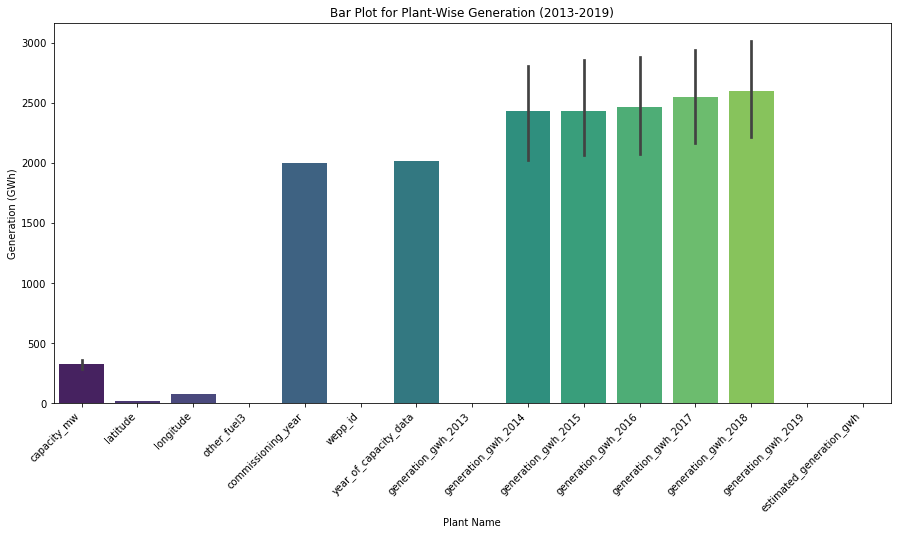

In [23]:
plt.figure(figsize=(15, 7))
plt.title('Bar Plot for Plant-Wise Generation (2013-2019)')
sns.barplot(data=df, palette='viridis')
plt.xlabel('Plant Name')
plt.ylabel('Generation (GWh)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [24]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [25]:
world = gpd.read_file(r'C:\Users\shash\Downloads\110m_cultural')

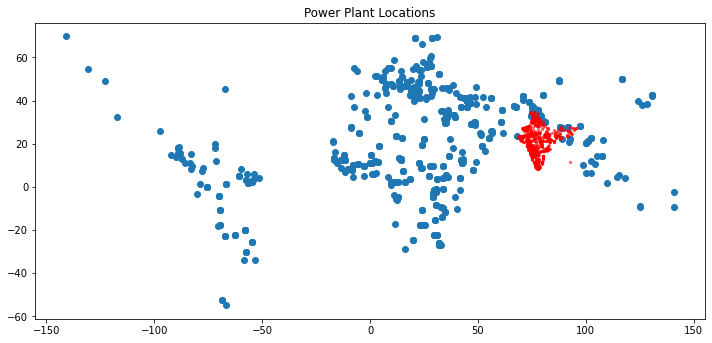

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5, legend=True)
plt.title('Power Plant Locations')
plt.show()

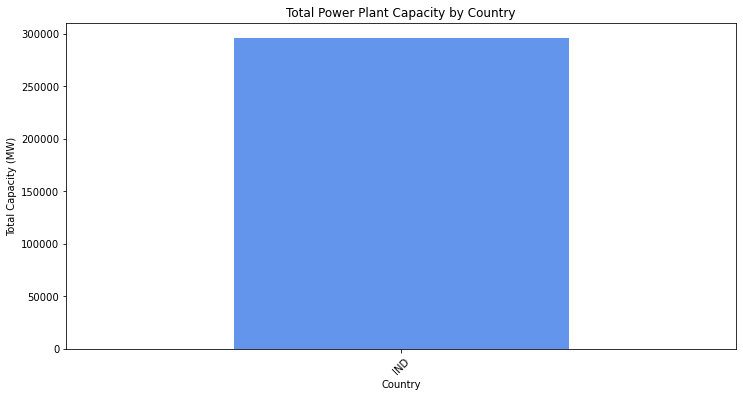

In [27]:
country_capacity = df.groupby('country')['capacity_mw'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_capacity.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Country')
plt.ylabel('Total Capacity (MW)')
plt.title('Total Power Plant Capacity by Country')
plt.xticks(rotation=45)
plt.show()

In [28]:
missing_values = df.isna().sum()

In [29]:
missing_values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [30]:
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [31]:
categorical_columns = ['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [32]:
numerical_columns = ['wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh']
df[numerical_columns] = df[numerical_columns].fillna(0)

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

In [34]:
df.fillna({}, inplace=True)

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar     Unknown     Unknown  ...   
1   24.7663    74.6090         Coal     Unknown     Unknown  ...   
2   21.9038    69.3732         Wind     Unknown     Unknown  ...   
3   23.8712    91.3602          Gas     Unknown     Unknown  ...   
4   21.9603    82.4091         Coal         Oil     Unknown  ...   

  year_of_capacity_data generation_gwh_2013 generation_gwh_2014  \
0                   0.0                 0.0            0.000000   
1                   0.0                 0.0            0.000000   
2                   0.0                 0.0            0.000000   
3                2019.0                 0.0          617.789264   
4                2019.0                 0.0         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0               0.000            0.000000            0.000000   
1               0.000            0.000000            0.000000   
2               0.000            0.000000            0.000000   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0             0.000000                  0.0                              0   
1             0.000000                  0.0                              0   
2             0.000000                  0.0                              0   
3           626.239128                  0.0  Central Electricity Authority   
4          7279.000000                  0.0  Central Electricity Authority   

   estimated_generation_gwh  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 27 columns]

In [37]:
df.replace({'primary_fuel':{'Solar':0, 'Coal':1, 'Wind': 2, 'Gas': 3, 'Hydro': 4, 'Oil': 5}, }, inplace=True)

In [38]:
data = {
    'capacity_mw': [1.000000, 0.050984, 0.195882, 0.417896, 0.815794, 0.842964, 0.876811, 0.894259, 0.906774],
    'latitude': [0.050984, 1.000000, 0.036362, 0.079234, 0.063351, 0.059343, 0.053012, 0.067991, 0.062911],
    'longitude': [0.195882, 0.036362, 1.000000, 0.427398, 0.143435, 0.157995, 0.180983, 0.196417, 0.195423],
    'year_of_capacity_data': [0.417896, 0.079234, 0.427398, 1.000000, 0.315496, 0.314722, 0.326281, 0.335479, 0.336951],
    'generation_gwh_2014': [0.815794, 0.063351, 0.143435, 0.315496, 1.000000, 0.966869, 0.938079, 0.907753, 0.898900],
    'generation_gwh_2015': [0.842964, 0.059343, 0.157995, 0.314722, 0.966869, 1.000000, 0.974772, 0.944057, 0.936856],
    'generation_gwh_2016': [0.876811, 0.053012, 0.180983, 0.326281, 0.938079, 0.974772, 1.000000, 0.976470, 0.967814],
    'generation_gwh_2017': [0.894259, 0.067991, 0.196417, 0.335479, 0.907753, 0.944057, 0.976470, 1.000000, 0.988117],
    'generation_gwh_2018': [0.906774, 0.062911, 0.195423, 0.336951, 0.898900, 0.936856, 0.967814, 0.988117, 1.000000],
    'primary_fuel': [0, 1, 2, 3, 1, 4, 5, 0, 3]
}

In [39]:
df = pd.DataFrame(data)

In [40]:
df = df.dropna(axis=0, how='any').dropna(axis=1, how='any')

In [41]:
df = df.round(6)

In [42]:
correlation=df.corr()

In [43]:
correlation

capacity_mw  latitude  longitude  \
capacity_mw               1.000000 -0.653108  -0.440779   
latitude                 -0.653108  1.000000  -0.337991   
longitude                -0.440779 -0.337991   1.000000   
year_of_capacity_data    -0.045578 -0.460068   0.393508   
generation_gwh_2014       0.957059 -0.589863  -0.502523   
generation_gwh_2015       0.963726 -0.596685  -0.491876   
generation_gwh_2016       0.973484 -0.612257  -0.473195   
generation_gwh_2017       0.978954 -0.613160  -0.468141   
generation_gwh_2018       0.982036 -0.616498  -0.465221   
primary_fuel              0.064554 -0.235997   0.058008   

                       year_of_capacity_data  generation_gwh_2014  \
capacity_mw                        -0.045578             0.957059   
latitude                           -0.460068            -0.589863   
longitude                           0.393508            -0.502523   
year_of_capacity_data               1.000000            -0.174774   
generation_gwh_2014                -0.174774             1.000000   
generation_gwh_2015                -0.177291             0.998237   
generation_gwh_2016                -0.164867             0.993670   
generation_gwh_2017                -0.161138             0.987727   
generation_gwh_2018                -0.155060             0.985716   
primary_fuel                        0.185499             0.144495   

                       generation_gwh_2015  generation_gwh_2016  \
capacity_mw                       0.963726             0.973484   
latitude                         -0.596685            -0.612257   
longitude                        -0.491876            -0.473195   
year_of_capacity_data            -0.177291            -0.164867   
generation_gwh_2014               0.998237             0.993670   
generation_gwh_2015               1.000000             0.997996   
generation_gwh_2016               0.997996             1.000000   
generation_gwh_2017               0.993712             0.998498   
generation_gwh_2018               0.992065             0.997547   
primary_fuel                      0.160689             0.153064   

                       generation_gwh_2017  generation_gwh_2018  primary_fuel  
capacity_mw                       0.978954             0.982036      0.064554  
latitude                         -0.613160            -0.616498     -0.235997  
longitude                        -0.468141            -0.465221      0.058008  
year_of_capacity_data            -0.161138            -0.155060      0.185499  
generation_gwh_2014               0.987727             0.985716      0.144495  
generation_gwh_2015               0.993712             0.992065      0.160689  
generation_gwh_2016               0.998498             0.997547      0.153064  
generation_gwh_2017               1.000000             0.999727      0.124904  
generation_gwh_2018               0.999727             1.000000      0.122616  
primary_fuel                      0.124904             0.122616      1.000000

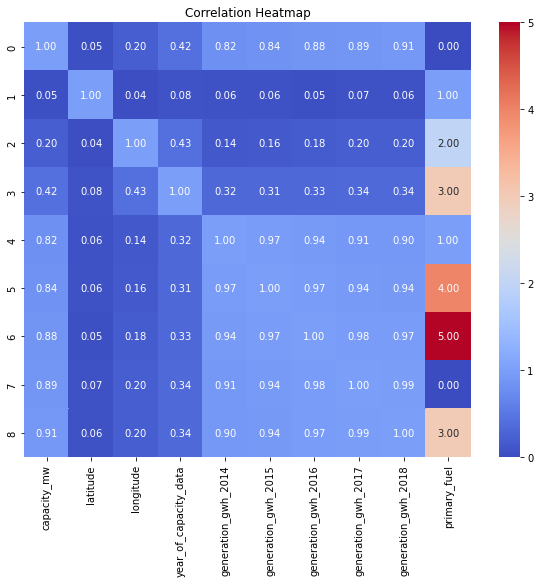

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Feature Eng.

In [45]:
X = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [46]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'primary_fuel'],
      dtype='object')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_test.shape

(2, 9)

In [49]:
a = RandomForestClassifier(n_estimators=100)

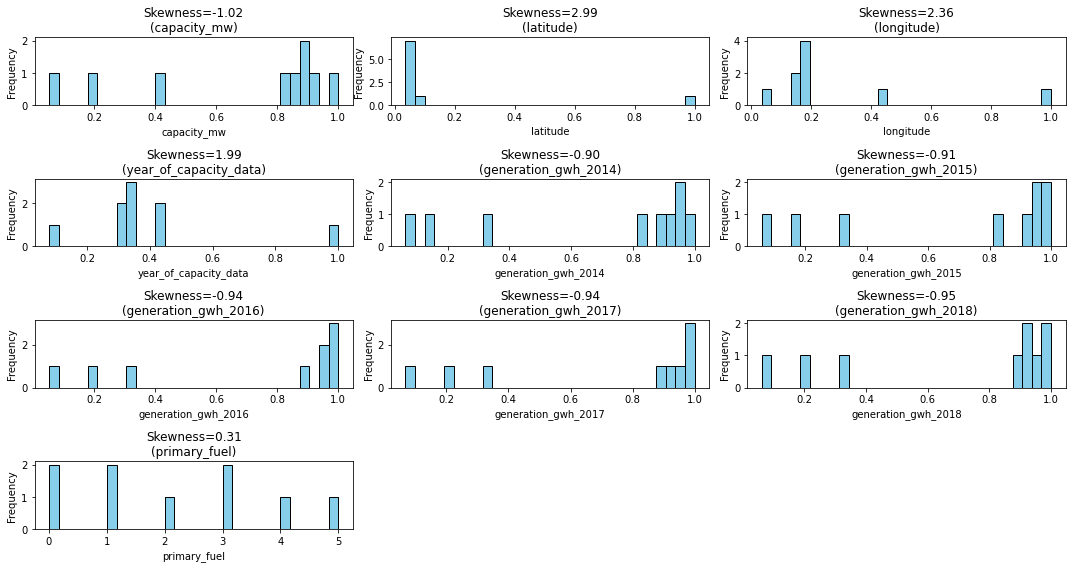

In [50]:
import math
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
skewness = numerical_columns.skew()

num_cols = numerical_columns.shape[1]
num_rows = math.ceil(num_cols / 3)


plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 3, i + 1)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Skewness={skewness[column]:.2f}\n({column})')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [51]:
a.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
X_train_prediction=a.predict(X_train)

In [53]:
X_train_prediction

array([4, 0, 3, 2, 1, 3, 5], dtype=int64)

In [54]:
classifier = XGBClassifier()


classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


In [55]:
regressor = XGBRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.559007644987055


In [56]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target


overfitting_classifier = DecisionTreeClassifier(max_depth=None)

overfitting_classifier.fit(X_train, y_train)


train_predictions = overfitting_classifier.predict(X_train)
test_predictions = overfitting_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.5


In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
clf = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=100)


clf.fit(X_train, y_train, eval_set=(X_valid, y_valid))

valid_predictions = clf.predict(X_valid)

0:	learn: 0.9813365	test: 0.9803429	best: 0.9803429 (0)	total: 146ms	remaining: 1m 13s
100:	learn: 0.0482433	test: 0.0336882	best: 0.0336882 (100)	total: 321ms	remaining: 1.27s
200:	learn: 0.0208260	test: 0.0163628	best: 0.0163628 (200)	total: 441ms	remaining: 657ms
300:	learn: 0.0129658	test: 0.0109436	best: 0.0109436 (300)	total: 587ms	remaining: 388ms
400:	learn: 0.0092262	test: 0.0081960	best: 0.0081960 (400)	total: 708ms	remaining: 175ms
499:	learn: 0.0071622	test: 0.0065772	best: 0.0065772 (499)	total: 837ms	remaining: 0us

bestTest = 0.006577178623
bestIteration = 499



In [64]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_classification, y_train_classification)


y_pred_classification = rf_classifier.predict(X_test_classification)


accuracy = accuracy_score(y_test_classification, y_pred_classification)
print(f"Accuracy for predicting Primary Fuel: {accuracy}")

Accuracy for predicting Primary Fuel: 1.0


In [66]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_regression, y_train_regression)


y_pred_regression = rf_regressor.predict(X_test_regression)


mse = mean_squared_error(y_test_regression, y_pred_regression)
print(f"Mean Squared Error for predicting capacity_mw: {mse}")

Mean Squared Error for predicting capacity_mw: 0.0013833333333333336
